In [55]:
import pandas as PD
import numpy as np
%matplotlib inline
import matplotlib. pyplot as plt
import matplotlib
from sklearn.preprocessing import MinMaxScaler
from keras. layers import LSTM, Dense, Dropout
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib. dates as mandates
from sklearn.preprocessing import MinMaxScaler
from sklearn import linear_model
from keras.models import Sequential
from keras.layers import Dense
import keras.backend as K
from keras.callbacks import EarlyStopping
from keras import *


In [56]:
data1=pd.read_csv("BSE_30.csv")

data=data1.loc[data1['Symbol'] == 'ADANIPORTS']
data

,Symbol,Date,Open,High,Low,Close,Adj Close,Volume
0,ADANIPORTS,5/6/2008,150.000000,153.570007,147.820007,151.149994,134.313477,1782030.0
1,ADANIPORTS,5/7/2008,152.000000,154.460007,150.240005,153.309998,136.232864,1180015.0
2,ADANIPORTS,5/8/2008,152.199997,156.759995,150.199997,155.889999,138.525497,1856245.0
3,ADANIPORTS,5/9/2008,155.000000,160.600006,154.210007,156.520004,139.085312,3251375.0
4,ADANIPORTS,5/12/2008,156.000000,163.479996,151.000000,162.500000,144.399170,5031635.0
...,...,...,...,...,...,...,...,...
2464,ADANIPORTS,4/27/2018,399.000000,405.049988,399.000000,401.450012,401.450012,109595.0
2465,ADANIPORTS,4/30/2018,406.899994,410.799988,399.000000,406.450012,406.450012,107863.0
2466,ADANIPORTS,5/2/2018,407.100006,411.000000,396.600006,399.899994,399.899994,119475.0
2467,ADANIPORTS,5/3/2018,399.899994,406.399994,394.299988,396.799988,396.799988,191133.0


In [57]:
nan_value = float("NaN")
data.replace(" ", nan_value, inplace=True)

data.dropna(subset = ["Symbol","Date","Open","High","Low", "Adj Close", "Adj Close"], inplace=True)

<ipython-input-57-1ed847c7fb03>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.replace(" ", nan_value, inplace=True)
<ipython-input-57-1ed847c7fb03>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.dropna(subset = ["Symbol","Date","Open","High","Low", "Adj Close", "Adj Close"], inplace=True)


In [58]:
data.isnull().values.any()

False

In [59]:
all_stock_names = data['Symbol'].unique()
print(all_stock_names)

['ADANIPORTS']


<AxesSubplot:>

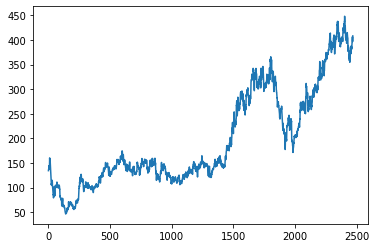

In [60]:
data["Adj Close"].plot()

In [61]:
output_var = pd.DataFrame(data["Adj Close"])
#Selecting the Features
features = ["Open", "High", "Low", "Volume"]

In [62]:
scaler = MinMaxScaler()
feature_transform = scaler.fit_transform(data[features])
feature_transform= pd.DataFrame(columns=features, data=feature_transform, index=data.index)
feature_transform.head()

,Open,High,Low,Volume
0,0.250213,0.253277,0.255205,0.054346
1,0.255228,0.255507,0.261518,0.035986
2,0.255730,0.261271,0.261414,0.056609
3,0.262751,0.270893,0.271876,0.099156
4,0.265259,0.278111,0.263501,0.153448


In [63]:
timesplit= TimeSeriesSplit(n_splits=10)
for train_index, test_index in timesplit.split(feature_transform):
        X_train, X_test = feature_transform[:len(train_index)], feature_transform[len(train_index): (len(train_index)+len(test_index))]
        y_train, y_test = output_var[:len(train_index)].values.ravel(), output_var[len(train_index): (len(train_index)+len(test_index))].values.ravel()

In [64]:
trainX =np.array(X_train)
testX =np.array(X_test)
X_train = trainX.reshape(X_train.shape[0], 1, X_train.shape[1])
X_test = testX.reshape(X_test.shape[0], 1, X_test.shape[1])

In [65]:
lstm = Sequential()
lstm.add(LSTM(32, input_shape=(1, trainX.shape[1]), activation="relu", return_sequences=False))
lstm.add(Dense(1))
lstm.compile(loss="mean_squared_error", optimizer="adam")
#plot_model(lstm, show_shapes=True, show_layer_names=True)

In [66]:
history=lstm.fit(X_train, y_train, epochs=100, batch_size=8, verbose=1, shuffle=False)

Epoch 1/100
280/280 [==============================] - 1s 894us/step - loss: 36627.5664
Epoch 2/100
280/280 [==============================] - 0s 866us/step - loss: 32414.8926
Epoch 3/100
280/280 [==============================] - 0s 874us/step - loss: 25618.0234
Epoch 4/100
280/280 [==============================] - 0s 870us/step - loss: 17872.8125
Epoch 5/100
280/280 [==============================] - 0s 1ms/step - loss: 10961.9248
Epoch 6/100
280/280 [==============================] - 0s 876us/step - loss: 5887.3550
Epoch 7/100
280/280 [==============================] - 0s 892us/step - loss: 2815.7219
Epoch 8/100
280/280 [==============================] - 0s 900us/step - loss: 1315.3695
Epoch 9/100
280/280 [==============================] - 0s 878us/step - loss: 736.4818
Epoch 10/100
280/280 [==============================] - 0s 951us/step - loss: 550.9838
Epoch 11/100
280/280 [==============================] - 0s 911us/step - loss: 484.5697
Epoch 12/100
280/280 [===================

280/280 [==============================] - 0s 1ms/step - loss: 14.7397
Epoch 97/100
280/280 [==============================] - 0s 1ms/step - loss: 14.7304
Epoch 98/100
280/280 [==============================] - 0s 875us/step - loss: 14.7212
Epoch 99/100
280/280 [==============================] - 0s 1ms/step - loss: 14.7120
Epoch 100/100
280/280 [==============================] - 0s 1ms/step - loss: 14.7027


In [67]:
y_pred= lstm.predict(X_test)

7/7 [==============================] - 0s 2ms/step


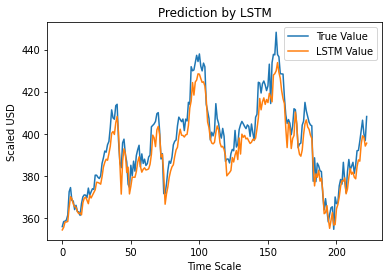

In [68]:
plt.plot(y_test, label="True Value")
plt.plot(y_pred, label="LSTM Value")
plt.title("Prediction by LSTM")
plt.xlabel("Time Scale")
plt.ylabel("Scaled USD")
plt.legend()
plt.show()